### Table of Contents in this notebook 

* [Chapter 1 라이브러리 및 데이터 가져오기](#chapter1)
* [Chapter 2 데이터 시각화를 통한 생존률 확인](#chapter2)
    * [Section 2.1 데이터 시각화를 통한 생존율 확인 결과 분석](#section_2_1)

### Chapter 1. 라이브러리 및 데이터 가져오기 <a class="anchor" id="chapter1"></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [87]:
train = pd.read_csv("../data/train.csv", index_col="PassengerId")
test = pd.read_csv("../data/test.csv")
#데이터의 상위 5개 출력
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
#데이터에 대한 기본정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- Survived : 0 = 사망, 1 = 생존  
- Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석  
- Sex : male = 남성, female = 여성  
- Age : 나이  
- SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수  
- Parch : 타이타닉 호에 동승한 부모 / 자식의 수  
- Ticket : 티켓 번호  
- Fare : 승객 요금  
- Cabin : 방 호수  
- Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

In [89]:
#데이터 결측값 파악
print(train.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


나이, 객실, 탑승지 데이터에 결측값이 있다.

### Chapter 2. 데이터 시각화를 통한 생존률 확인 <a class="anchor" id="chapter2"></a>

In [90]:
#생존자와 사망자 인원
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

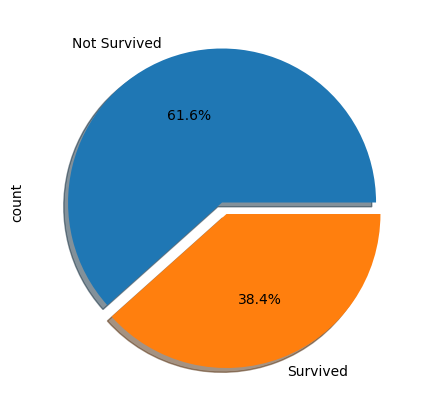

In [91]:
#생존자와 사망자 인원 확인
plt.figure(figsize=(8,5))
labels = ['Not Survived','Survived']
train['Survived'].value_counts().plot.pie(explode=[0, 0.08], shadow=True, autopct='%1.1f%%',labels=labels)

In [92]:
#Pclass별 생존율
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


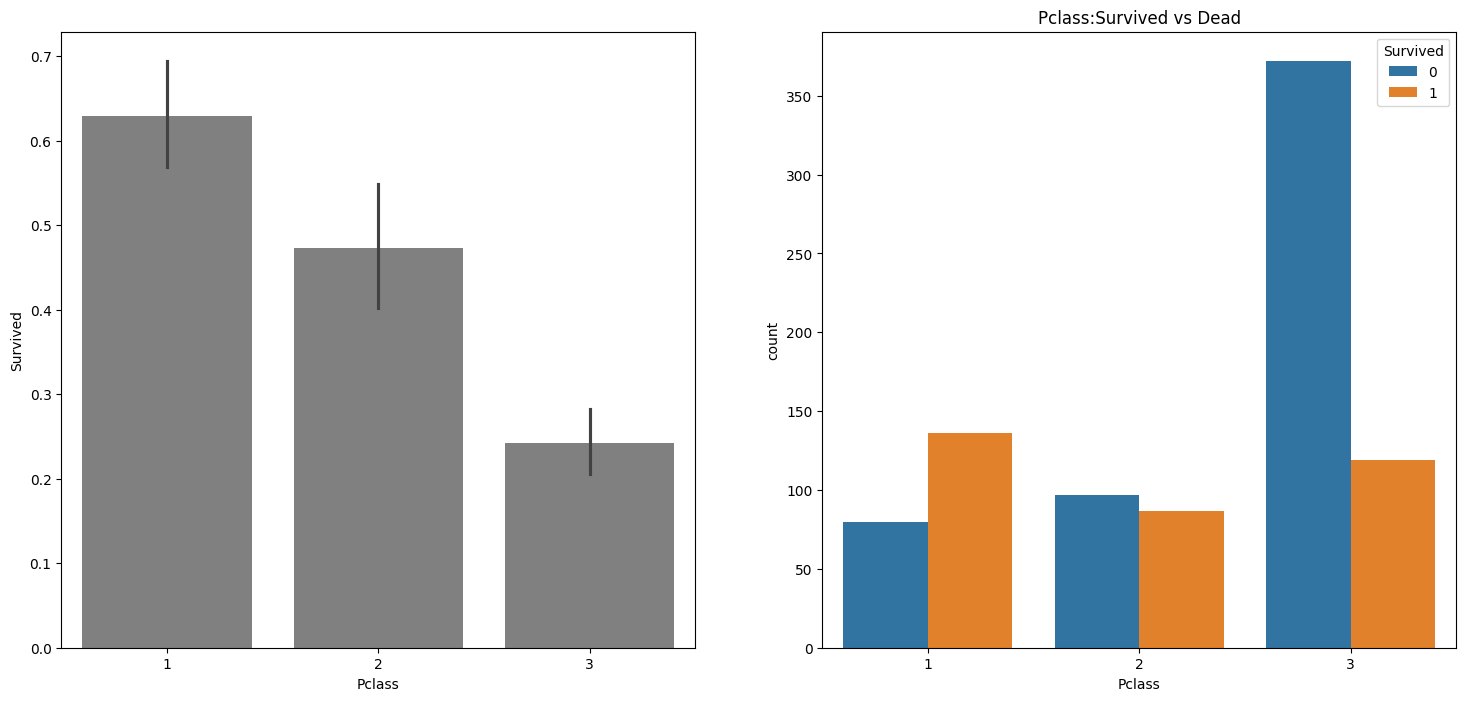

In [93]:
#Pclass별 생존율 확인
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.barplot(x = "Pclass", y = "Survived",data = train,color = 'gray',ax=ax[0])
sns.countplot(x ='Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- 높은 등급의 좌석일수록 높은 생존율을 보인다.
- 좌석 클래스는 생존율에 영향을 미친다.

In [94]:
#Sex별 생존율
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


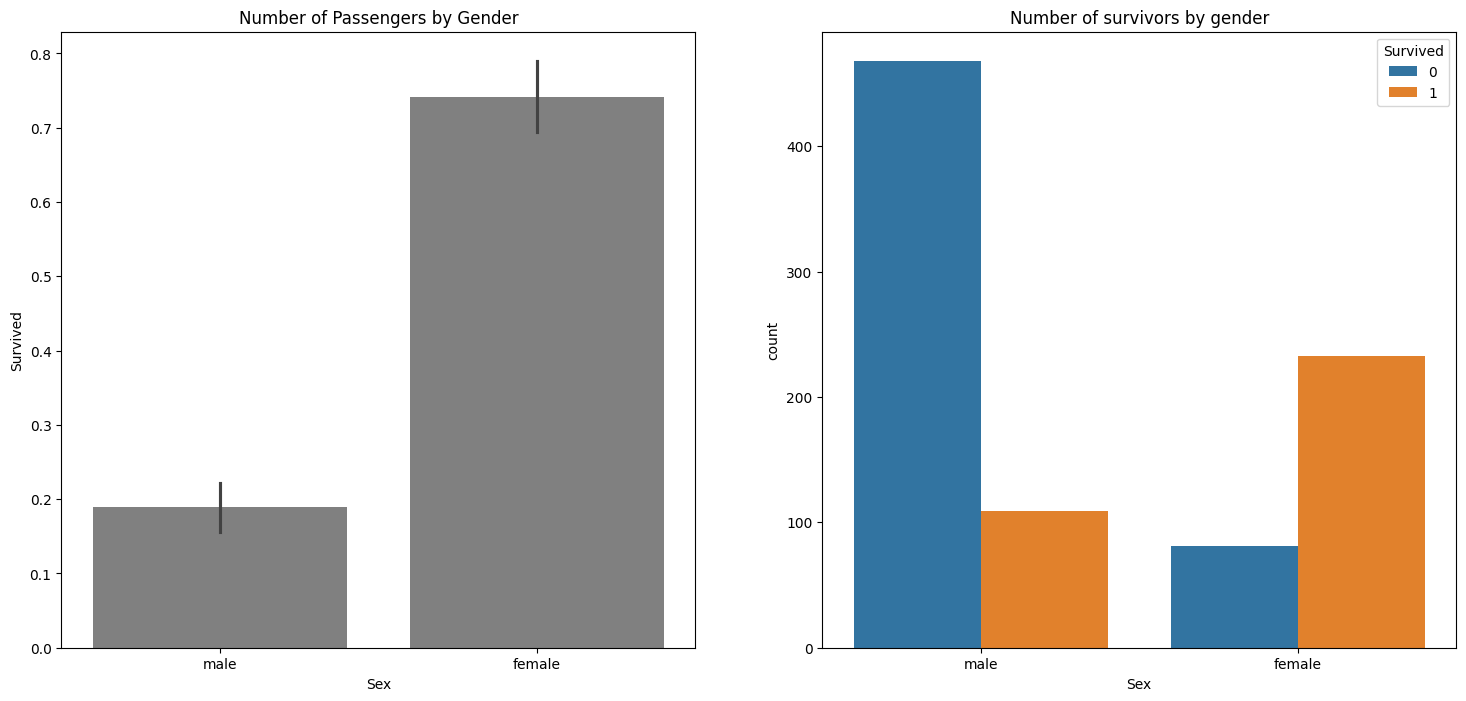

In [95]:
#Sex별 생존율 확인

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.barplot(x = "Sex", y = "Survived",data = train,color = 'gray',ax=ax[0])
ax[0].set_title('Number of Passengers by Gender')
sns.countplot(x ='Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Number of survivors by gender')
plt.show()

남성에 비해 여성의 생존율이 높다.

In [96]:
#Embarked별 생존율
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


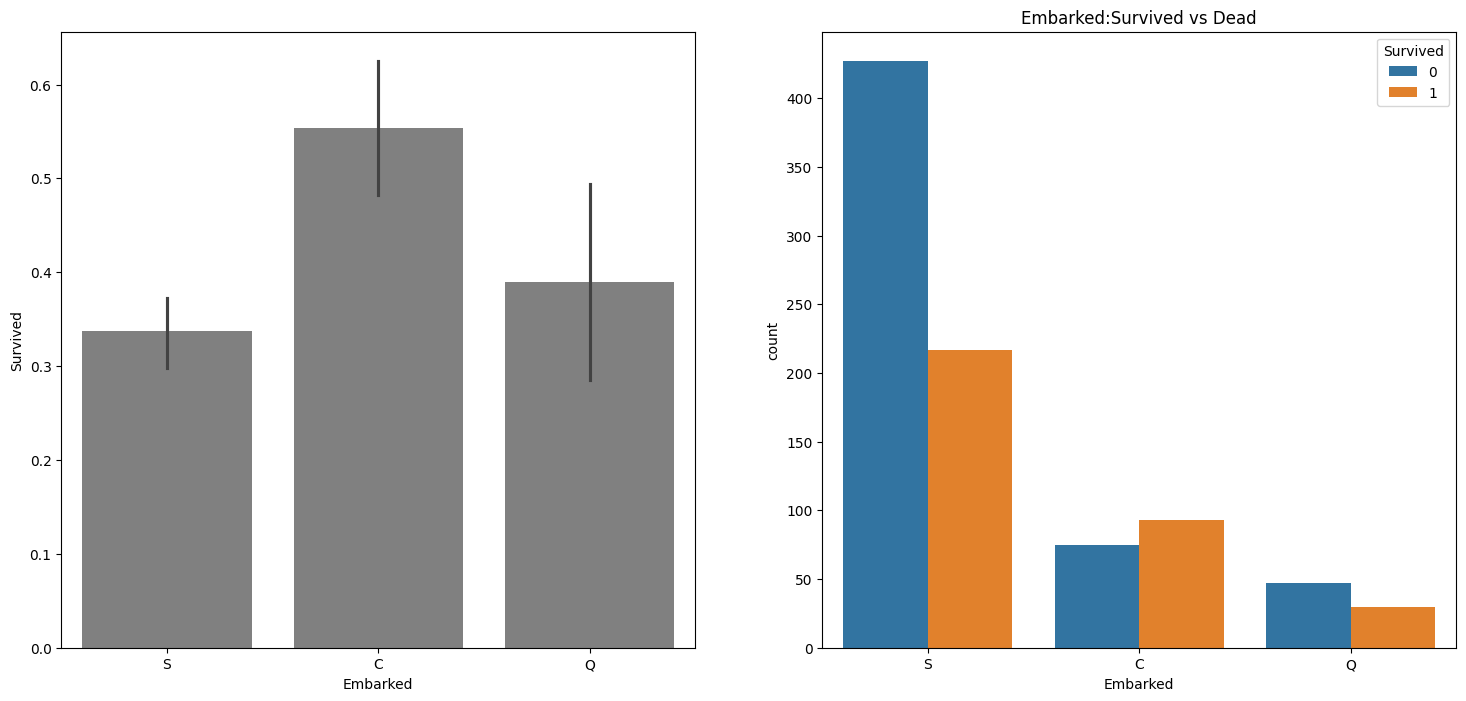

In [97]:
#Embarked별 생존율 확인
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.barplot(x = "Embarked", y = "Survived",data = train,color = 'gray',ax=ax[0])
sns.countplot(x ='Embarked', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
plt.show()

셰르부르, 퀸즈타운, 사우샘프턴 순으로 생존율이 높은 것을 확인할 수 있다.

In [98]:
#Fare별 생존율
train[['Fare','Survived']].groupby('Fare').mean()

,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000


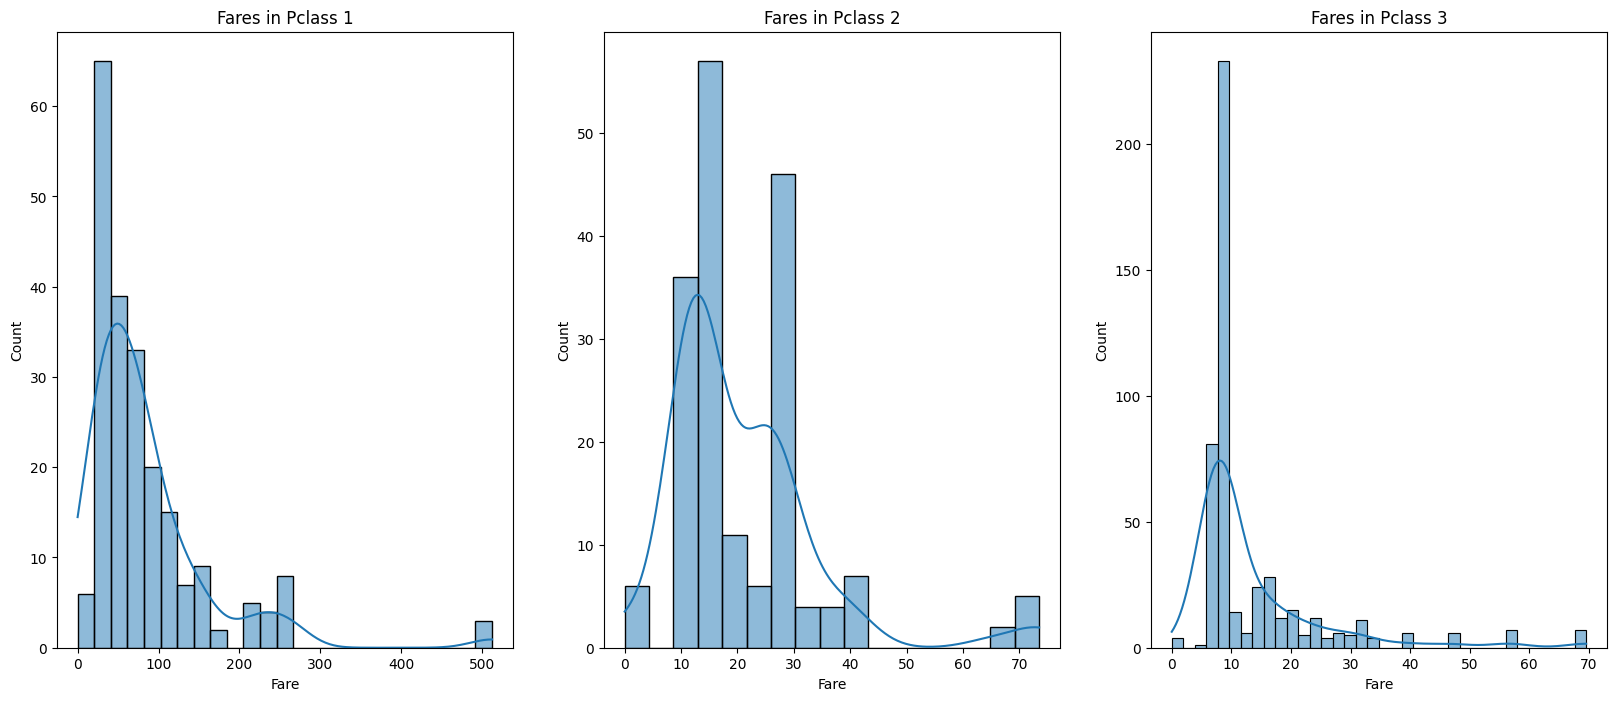

In [99]:
#각 Pclass에 따른 Fare의 분포
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.histplot(train[train['Pclass'] == 1]['Fare'], kde=True, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.histplot(train[train['Pclass'] == 2]['Fare'], kde=True, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.histplot(train[train['Pclass'] == 3]['Fare'], kde=True, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

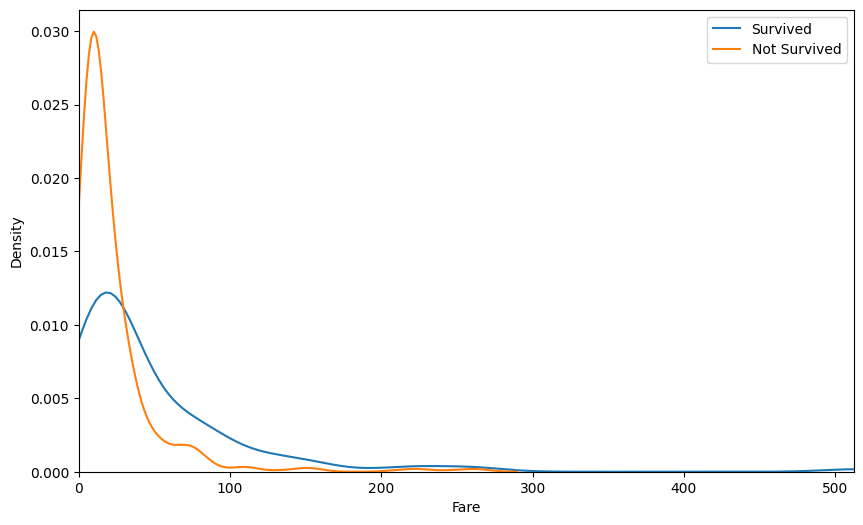

In [100]:
#Fare별 생존율 확인
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Fare'], ax=ax)
ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['Survived', 'Not Survived'])
 
plt.show()

1등석은 70-100정도의 요금을 내고, 많게는 500이상까지 지불하였다.  
2등석은 10-20의 요금을 지불하였다.  
3등석은 10정도의 요금을 지불하였다.  

탑승 금액이 적은 쪽의 사망율이 높다는 것을 알 수 있다.

In [101]:
#Age별 생존율
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

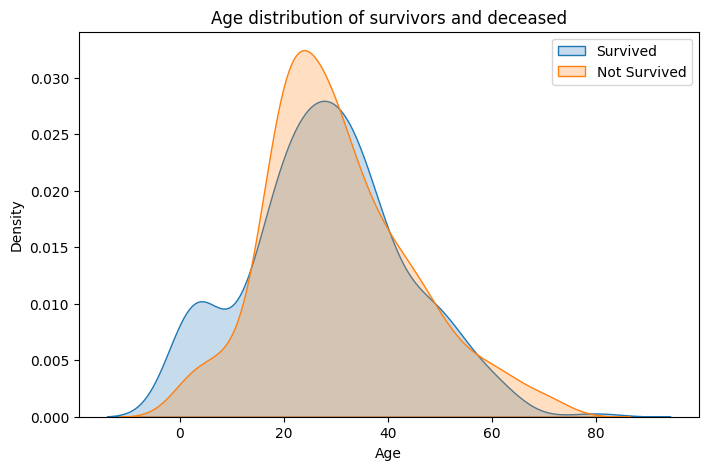

In [102]:
#Age별 생존율 확인
sur = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

plt.figure(figsize=(8, 5))
sns.kdeplot(sur['Age'], label='Survived', fill=True)
sns.kdeplot(dead['Age'], label='Not Survived', fill=True)

plt.title('Age distribution of survivors and deceased')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

영유아의 생존율이 비교적 높고, 2-30세의 생존율이 비교적 낮다.

In [103]:
#SibSp별 생존율
train[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<Axes: xlabel='SibSp', ylabel='Survived'>

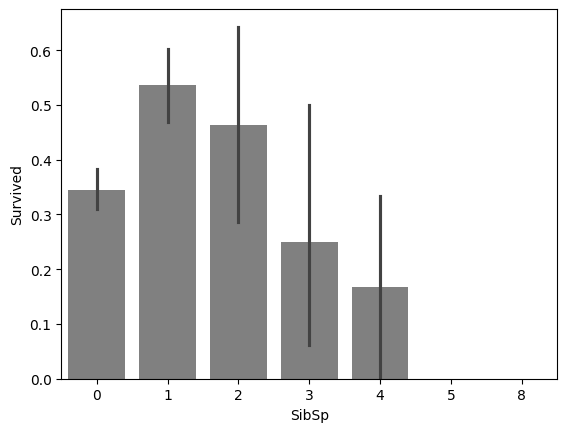

In [104]:
#SibSp별 생존율 확인
sns.barplot(x = "SibSp", y = "Survived",data = train,color = "gray")

동승 자매/배우자가 3-4명 이상인 경우 생존율이 낮다.

In [105]:
#Parch별 생존율
train[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


<Axes: xlabel='Parch', ylabel='Survived'>

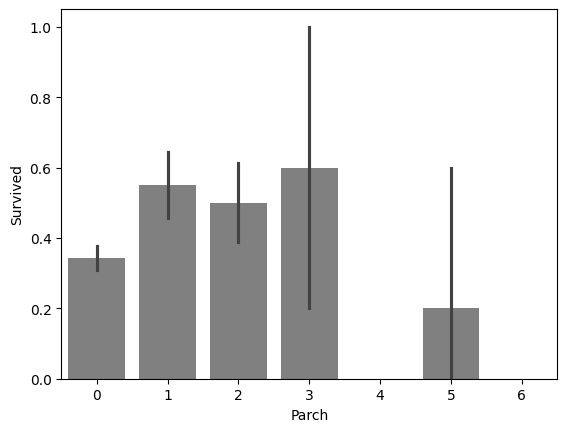

In [106]:
#Parch별 생존율 확인
sns.barplot(x = "Parch", y = "Survived",data = train,color = "gray")

동승 부모/자식이 3-4명 이상인 경우 생존율이 낮다.

#### Section 2.1 데이터 시각화를 통한 생존율 확인 결과 분석 <a class="anchor" id="section_2_1"></a>
- 높은 등급의 좌석일수록 높은 생존율을 보인다.
- 남성에 비해 여성의 생존율이 높다.
- 셰르부르, 퀸즈타운, 사우샘프턴 순으로 생존율이 높다.
- 탑승 금액이 적은 쪽의 사망율이 높다.
- 영유아의 생존율이 비교적 높고, 2-30세의 생존율이 비교적 낮다.
- 동승 자매/배우자가 3-4명 이상인 경우 생존율이 낮다.
- 동승 부모/자식이 3-4명 이상인 경우 생존율이 낮다.